In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mtfa import Material, Structure

In [2]:
font_family = 'sans'
font_size = 14
params= {'text.usetex': False,
#         'mathtext.fontset': 'stix',
         'mathtext.fontset': 'stixsans',
         'font.size': font_size,
         'axes.labelsize': font_size,
         'font.family': font_family,
         'figure.figsize': [7, 3],
         'legend.fontsize': font_size,
         'svg.fonttype':'none'
         }
plt.rcParams.update(params)

In [3]:
InAs = Material('InAs')
st = Structure(InAs, Nd = 1e16, length =300e-9, n=50)
st.z = np.append(np.linspace(0, st.length*0.05, st.n-40), 
                 np.linspace(st.length*0.07, st.length, 40))

C:\Users\Dmitry\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:293: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [13]:
# Inversion
st.V0 = 0.2
st.initGuess()
st.solve()
inv = st.sol

0:  |F(x)| = 0.000215683; step 1; tol 1.29754e-05
1:  |F(x)| = 4.90604e-06; step 1; tol 0.000465665
2:  |F(x)| = 1.7101e-08; step 1; tol 1.09351e-05
3:  |F(x)| = 4.30398e-13; step 1; tol 5.70088e-10
4:  |F(x)| = 4.65328e-17; step 1; tol 1.05201e-08


In [5]:
# Depliton
st.V0 = 0.1
st.initGuess()
st.solve()
delp = st.sol

0:  |F(x)| = 4.36384e-05; step 1; tol 2.12532e-06
1:  |F(x)| = 6.18217e-07; step 1; tol 0.000180628
2:  |F(x)| = 1.6496e-09; step 1; tol 6.40789e-06
3:  |F(x)| = 2.53385e-14; step 1; tol 2.12349e-10
4:  |F(x)| = 2.90587e-17; step 1; tol 1.18368e-06


In [6]:
# Accumulation
st.V0 = -0.2
st.initGuess()
st.solve()
acc = st.sol

0:  |F(x)| = 0.00218886; step 1; tol 0.00133552
1:  |F(x)| = 0.000244545; step 1; tol 0.0112337
2:  |F(x)| = 1.51566e-05; step 1; tol 0.00345722
3:  |F(x)| = 1.8764e-07; step 1; tol 0.00013794
4:  |F(x)| = 4.72045e-11; step 1; tol 5.69588e-08
5:  |F(x)| = 1.57885e-16; step 1; tol 1.00683e-11


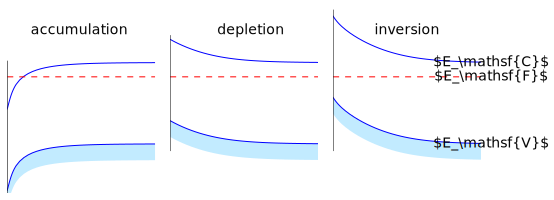

In [7]:
fill = (0.76,0.92,1)
fig = plt.figure()
phi_x1 = fig.add_subplot(131)
y = acc
phi_x1.plot(st.z*1e9, y - st.Ef, 'b',
            st.z*1e9, y - st.Ef - st.Eg, 'b',
            st.z*1e9, np.zeros_like(st.z), 'r--',
            [0, 0], [min(y-st.Ef - st.Eg)*1.1, max(y- st.Ef)*1.1], 'k')
phi_x1.fill_between(st.z*1e9, y - st.Eg - st.Ef, y - st.Ef - st.Eg-.07,
                    edgecolor=(0,0,0,0), facecolor=fill)
#phi_x1.set_xlabel('x, nm')
#phi_x1.set_ylabel('$\varphi$, V')
phi_x1.set_xlim(-0.1, 250)
phi_x1.set_ylim(-.5, 0.3)
phi_x1.get_yaxis().set_visible(False)
phi_x1.get_xaxis().set_visible(False)
phi_x1.set_frame_on(False)



phi_x2 = fig.add_subplot(132)
y = delp
phi_x2.plot(st.z*1e9, y - st.Ef, 'b',
            st.z*1e9, y - st.Ef - st.Eg, 'b',
            st.z*1e9, np.zeros_like(st.z), 'r--',
            [0, 0], [min(y-st.Ef - st.Eg)*1.1, max(y- st.Ef)*1.1], 'k')
phi_x2.fill_between(st.z*1e9, y - st.Eg - st.Ef, y - st.Ef - st.Eg-.07,
                    edgecolor=(0,0,0,0), facecolor=fill)
phi_x2.set_xlim(0, 250)
phi_x2.set_ylim(-.5, 0.3)
phi_x2.get_yaxis().set_visible(False)
phi_x2.get_xaxis().set_visible(False)
phi_x2.set_frame_on(False)


phi_x3 = fig.add_subplot(133)
y = inv
phi_x3.plot(st.z*1e9, y - st.Ef, 'b',
            st.z*1e9, y - st.Ef - st.Eg, 'b',
            st.z*1e9, np.zeros_like(st.z), 'r--',
            [0, 0], [min(y-st.Ef - st.Eg)*1.1, max(y- st.Ef)*1.1], 'k')
phi_x3.fill_between(st.z*1e9, y - st.Eg - st.Ef, y - st.Ef - st.Eg-.07,
                    edgecolor=(0,0,0,0), facecolor=fill)
phi_x3.set_xlim(0, 250)
phi_x3.set_ylim(-.5, 0.3)
phi_x3.get_yaxis().set_visible(False)
phi_x3.get_xaxis().set_visible(False)
phi_x3.set_frame_on(False)

lim = phi_x3.get_xlim()[1]*1.07 #position of label
# \includesvg gives an error if .text used in other axes
phi_x3.text(-430,0.2,'accumulation', ha="center", va="center")
phi_x3.text(-140,0.2,'depletion', ha="center", va="center")
phi_x3.text(125,0.2,'inversion', ha="center", va="center")
phi_x3.text(lim,-st.Ef,'\$E_\mathsf{C}$', ha="center", va="center")
phi_x3.text(lim,0.0,'\$E_\mathsf{F}$', ha="center", va="center")
phi_x3.text(lim,-st.Ef - st.Eg,'\$E_\mathsf{V}$', ha="center", va="center")

plt.tight_layout()
name2 = 'IP_InAs_pot'
plt.savefig(name2+'.svg', transparent=True)

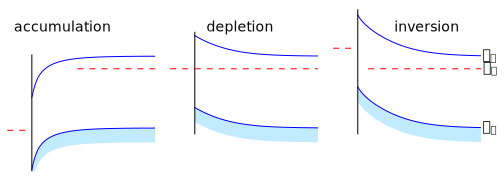

In [8]:
params= {'figure.figsize': [7, 2.7]}
plt.rcParams.update(params)


fill = (0.76,0.92,1)
fig = plt.figure()
phi_x1 = fig.add_subplot(131)
y = acc
phi_x1.plot(st.z*1e9, y - st.Ef, 'b',
            st.z*1e9, y - st.Ef - st.Eg, 'b',
            st.z[20:]*1e9, np.zeros_like(st.z)[20:], 'r--',
            [-50, -10], [-0.3,-0.3], 'r--',
            [0, 0], [min(y-st.Ef - st.Eg)*1.1, max(y- st.Ef)*1.1], 'k')
phi_x1.fill_between(st.z*1e9, y - st.Eg - st.Ef, y - st.Ef - st.Eg-.07,
                    edgecolor=(0,0,0,0), facecolor=fill)
#phi_x1.set_xlabel('x, nm')
#phi_x1.set_ylabel('$\varphi$, V')
phi_x1.set_xlim(-50, 250)
phi_x1.set_ylim(-.5, 0.3)
phi_x1.get_yaxis().set_visible(False)
phi_x1.get_xaxis().set_visible(False)
phi_x1.set_frame_on(False)



phi_x2 = fig.add_subplot(132)
y = delp
phi_x2.plot(st.z*1e9, y - st.Ef, 'b',
            st.z*1e9, y - st.Ef - st.Eg, 'b',
            st.z*1e9, np.zeros_like(st.z), 'r--',
            [-50, 0], [0,0], 'r--',
            [0, 0], [min(y-st.Ef - st.Eg)*1.1, max(y- st.Ef)*1.1], 'k')
phi_x2.fill_between(st.z*1e9, y - st.Eg - st.Ef, y - st.Ef - st.Eg-.07,
                    edgecolor=(0,0,0,0), facecolor=fill)
phi_x2.set_xlim(-50, 250)
phi_x2.set_ylim(-.5, 0.3)
phi_x2.get_yaxis().set_visible(False)
phi_x2.get_xaxis().set_visible(False)
phi_x2.set_frame_on(False)


phi_x3 = fig.add_subplot(133)
y = inv
phi_x3.plot(st.z*1e9, y - st.Ef, 'b',
            st.z*1e9, y - st.Ef - st.Eg, 'b',
            st.z[10:]*1e9, np.zeros_like(st.z)[10:], 'r--',
            [-50, -10], [0.1,0.1], 'r--',
            [0, 0], [min(y-st.Ef - st.Eg)*1.1, max(y- st.Ef)*1.1], 'k')
phi_x3.fill_between(st.z*1e9, y - st.Eg - st.Ef, y - st.Ef - st.Eg-.07,
                    edgecolor=(0,0,0,0), facecolor=fill)
phi_x3.set_xlim(-50, 250)
phi_x3.set_ylim(-.5, 0.3)
phi_x3.get_yaxis().set_visible(False)
phi_x3.get_xaxis().set_visible(False)
phi_x3.set_frame_on(False)

lim = phi_x3.get_xlim()[1]*1.07 #position of label
# \includesvg gives an error if .text used in other axes
phi_x3.text(-600,0.2,'accumulation', ha="center", va="center")
phi_x3.text(-240,0.2,'depletion', ha="center", va="center")
phi_x3.text(140,0.2,'inversion', ha="center", va="center")
phi_x3.text(lim,-st.Ef,'$E_\mathsf{C}$', ha="center", va="center")
phi_x3.text(lim,0.0,'$E_\mathsf{F}$', ha="center", va="center")
phi_x3.text(lim,-st.Ef - st.Eg,'$E_\mathsf{V}$', ha="center", va="center")

plt.tight_layout()
name2 = 'IP_InAs_pot'
#plt.savefig(name2+'.svg', transparent=True)
plt.show()

**Вопрос:** Какая диаграмма будет в InAs при нулевом смещении? 